# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Andrew Vu
### Student ID: 015055911
### Email address: andrew.k.vu@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

From files section of Canvas page:  
knn.synthetic_data  
kmeans.synthetic_data  
  
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/  
https://towardsdatascience.com/how-to-build-knn-from-scratch-in-python-5e22b8920bd2  
https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch  
https://medium.com/analytics-vidhya/knn-implementation-from-scratch-96-6-accuracy-python-machine-learning-31ba66958644  
https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [238]:
np.random.seed(42)

#### Code the solution

### KNN FUNCTION

In [239]:
# newObservation is a point in the test data set
# referenceData is the training data set

def knn(newObservation, referenceData, k=3):
    distances_from_newdata = []  # array to store distances
    k_shortest_distances = []    # array for the k shortest distances
    
    # compute the distance between each point in the reference data and the newObservation point
    for i in range(len(referenceData)):
        dist = distance.euclidean(referenceData.iloc[i], newObservation) 
        distances_from_newdata.append([dist, i]) # add this computed distance to the distances_from_newdata array with its index
    distances_from_newdata.sort()
    k_shortest_distances = (distances_from_newdata)[0:k]

    return k_shortest_distances # returns the array of the k shortest distances with their respective row number

### PREDICTIONS FUNCTION

In [240]:
def predictions(X_test, ref_data, Y_train):
    labels = [] # output
    for i in range(len(X_test)):
        modelabels = [] # create a separate array for determining the majority of the labels
        distance_indexes = knn(X_test.iloc[i], ref_data, k=3)
        for j in range(len(distance_indexes)): # for however many distances there are in the return value of knn
            modelabels.append(Y_train[distance_indexes[j][1]]) # append that distance's Y_train label value to a separate array
        lab = mode(modelabels) # returns an array of the majority of the labels as well as the count of how many
        lab = lab.mode[0]      # returns specifically the mode
        labels.append(lab)     # adds this label to the real labels       
    return labels

## Generate 2D Data

In [241]:
n = 100 # n = data points

# loc = mean or mass of gravity in which the generated data centers around this value
# scale = standard deviation
# size = how many data points you want 

# CLASS 0
X0 = np.random.normal(loc = -2.0, scale = 2.0, size = int(n/2)) 
Y0 = np.random.normal(loc = 0.0, scale = 1.0, size = int(n/2))

# CLASS 1
X1 = np.random.normal(loc = 2.0, scale = 2.0, size = int(n/2)) 
Y1 = np.random.normal(loc = 0.0, scale = 1.0, size = int(n/2))

X = np.concatenate((X0, X1), axis = 0)
Y = np.concatenate((Y0, Y1), axis = 0)

### Generate Labels for 2D

In [242]:
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels2D = l1+l2

### Visualize the generated data

In [243]:
dt = pd.DataFrame({'X':X, 'Y':Y}, columns=['X', 'Y'])
dt.head()

,X,Y
0,-1.006572,0.324084
1,-2.276529,-0.385082
2,-0.704623,-0.676922
3,1.046060,0.611676
4,-2.468307,1.031000


In [244]:
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels2D, test_size=0.2, random_state=0)
# X_train = data for training set
# X_test = data for test set
# Y_train = labels 0/1 for training set
# Y_test = labels 0/1 or test set
# 80% training, 20% test split
print(X_train)

           X         Y
43 -2.602207 -0.327662
62  2.120460  1.158596
3   1.046060  0.611676
71  0.181225 -0.815810
45 -3.439688 -1.463515
..       ...       ...
96 -0.473901 -0.883857
67 -0.337356  1.896793
64  1.615278  0.963376
47  0.114244  0.261055
44 -4.957044 -0.392108

[80 rows x 2 columns]


### ACCURACY FOR 2D

In [245]:
prediction_results = predictions(X_test, X_train, Y_train)
print(Y_test)
print(prediction_results)
print("Accuracy of the predictions on the 2D test dataset is " + str(accuracy_score(Y_test, prediction_results)))

[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Accuracy of the predictions on the 2D test dataset is 0.9


### ACTUAL VS PREDICTED LABELS VISUALIZATION

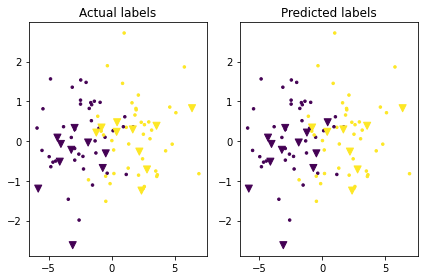

In [246]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=prediction_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

## Generate 3-D data

In [247]:
n = 1000 # n data points

# CLASS 0
X0 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y0 = np.random.normal(loc = -3, scale = 1, size = int(n/4))
Z0 = np.random.normal(loc = -1, scale = 1, size = int(n/4))
# CLASS 1
X1 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y1 = np.random.normal(loc = 1, scale = 2, size = int(n/4))
Z1 = np.random.normal(loc = 1, scale = 1, size = int(n/4))
# CLASS 2
X2 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y2 = np.random.normal(loc = 3, scale = 1, size = int(n/4))
Z2 = np.random.normal(loc = 4, scale = 1, size = int(n/4))
# CLASS 3
X3 = np.random.normal(loc = 0, scale = 3, size = int(n/4))
Y3 = np.random.normal(loc = 5, scale = 3, size = int(n/4))
Z3 = np.random.normal(loc = -3, scale = 1, size = int(n/4))

X = np.concatenate((X0, X1, X2, X3), axis = 0)
Y = np.concatenate((Y0, Y1, Y2, Y3), axis = 0)
Z = np.concatenate((Z0, Z1, Z2, Z3), axis = 0)

In [248]:
l1 = [0]*int(n/4)
l2 = [1]*int(n/4)
l3 = [2]*int(n/4)
l4 = [3]*int(n/4)
labels3D = l1+l2+l3+l4

In [249]:
dt = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z}, columns=['X', 'Y', 'Z'])
dt.head()

,X,Y,Z
0,1.073362,-3.062679,-1.522723
1,1.682354,-2.044858,0.049009
2,3.249154,-3.985726,-1.704344
3,3.161406,-2.495953,-2.408461
4,-4.133008,-3.530258,-2.556629


In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(dt, labels3D, test_size=0.2, random_state=0)
print(X_train)

            X         Y         Z
687  1.272183  4.549020  3.075767
500  1.051890  1.226968  5.804348
332  1.197669  2.416217  1.323168
979 -0.790345  7.956349 -2.484372
817 -6.657901  6.364223 -5.832156
..        ...       ...       ...
835 -0.885270  3.944236 -2.553127
192 -3.960700 -3.259591  0.066675
629  0.056549  2.549811  4.849102
559  3.944743  3.937570  4.198948
684 -0.079217  2.645959  4.032797

[800 rows x 3 columns]


## ACCURACY FOR 3D

In [251]:
prediction_results = predictions(X_test, X_train, Y_train)
print(Y_test)
print("\n")
print(prediction_results)
print("Accuracy of the predictions on the 3D test dataset is " + str(accuracy_score(Y_test, prediction_results)))

[3, 3, 1, 2, 2, 3, 0, 0, 1, 2, 1, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3, 2, 2, 3, 1, 2, 3, 1, 3, 1, 0, 3, 2, 2, 1, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 2, 0, 2, 1, 3, 1, 1, 3, 1, 2, 1, 2, 0, 1, 2, 3, 3, 0, 3, 1, 2, 2, 3, 3, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 0, 3, 0, 3, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 1, 0, 2, 3, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 0, 2, 3, 0, 3, 3, 1, 1, 3, 3, 2, 1, 3, 0, 3, 3, 1, 0, 3, 2, 2, 0, 2, 0]


[3, 3, 1, 2, 2, 3, 0, 0, 2, 2, 1, 1, 3, 0, 2, 1, 3, 0, 0, 0, 0, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3, 2, 2, 3, 0, 2, 3, 1, 3, 1, 0, 3, 2, 2, 1, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 2, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 2, 2, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 0, 1, 1, 3, 1, 0, 3, 1, 2, 2, 3, 3, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 0, 3, 0, 3, 1, 1, 3, 2, 1, 2, 

### ACTUAL VS PREDICTED LABELS VISUALIZATION

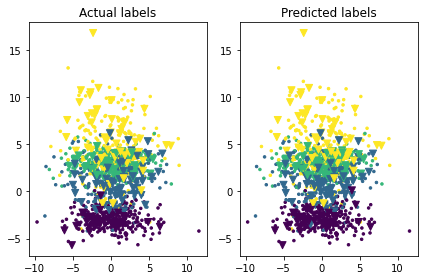

In [252]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=prediction_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()